In [22]:
!pip install pandas numpy matplotlib statsmodels


In [23]:
import pandas as pd

wifi_data = {
    "timestamp": pd.date_range("2025-01-01 08:00", periods=10, freq="h"),
    "room_id": ["C101"] * 10,
    "connected_devices": [12, 28, 42, 38, 15, 8, 30, 45, 40, 18]
}

wifi_df = pd.DataFrame(wifi_data)
wifi_df

,timestamp,room_id,connected_devices
0,2025-01-01 08:00:00,C101,12
1,2025-01-01 09:00:00,C101,28
2,2025-01-01 10:00:00,C101,42
3,2025-01-01 11:00:00,C101,38
4,2025-01-01 12:00:00,C101,15
5,2025-01-01 13:00:00,C101,8
6,2025-01-01 14:00:00,C101,30
7,2025-01-01 15:00:00,C101,45
8,2025-01-01 16:00:00,C101,40
9,2025-01-01 17:00:00,C101,18


In [24]:
energy_data = {
    "timestamp": pd.date_range("2025-01-01 08:00", periods=10, freq="H"),
    "room_id": ["C101"] * 10,
    "energy_kwh": [1.9, 2.7, 3.6, 3.4, 2.3, 1.8, 3.0, 3.8, 3.5, 2.4]
}

energy_df = pd.DataFrame(energy_data)
energy_df


/tmp/ipython-input-1898811280.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  "timestamp": pd.date_range("2025-01-01 08:00", periods=10, freq="H"),


,timestamp,room_id,energy_kwh
0,2025-01-01 08:00:00,C101,1.9
1,2025-01-01 09:00:00,C101,2.7
2,2025-01-01 10:00:00,C101,3.6
3,2025-01-01 11:00:00,C101,3.4
4,2025-01-01 12:00:00,C101,2.3
5,2025-01-01 13:00:00,C101,1.8
6,2025-01-01 14:00:00,C101,3.0
7,2025-01-01 15:00:00,C101,3.8
8,2025-01-01 16:00:00,C101,3.5
9,2025-01-01 17:00:00,C101,2.4


In [25]:
df = pd.merge(wifi_df, energy_df, on=["timestamp", "room_id"])
df.set_index("timestamp", inplace=True)
df


,room_id,connected_devices,energy_kwh
timestamp,,,
2025-01-01 08:00:00,C101,12,1.9
2025-01-01 09:00:00,C101,28,2.7
2025-01-01 10:00:00,C101,42,3.6
2025-01-01 11:00:00,C101,38,3.4
2025-01-01 12:00:00,C101,15,2.3
2025-01-01 13:00:00,C101,8,1.8
2025-01-01 14:00:00,C101,30,3.0
2025-01-01 15:00:00,C101,45,3.8
2025-01-01 16:00:00,C101,40,3.5


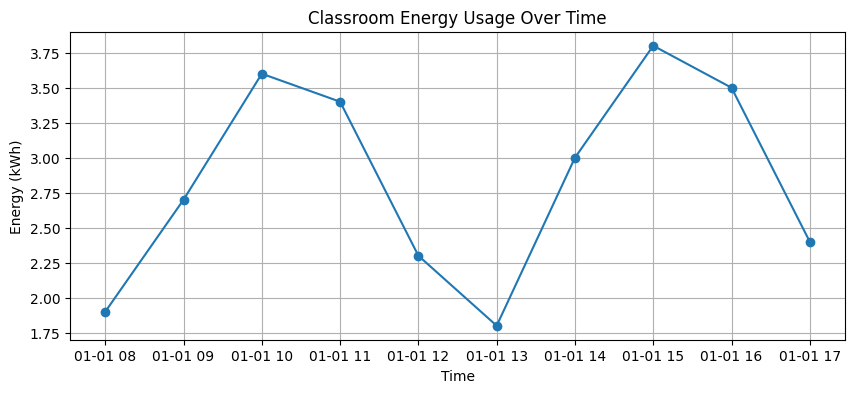

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(df.index, df["energy_kwh"], marker="o")
plt.title("Classroom Energy Usage Over Time")
plt.xlabel("Time")
plt.ylabel("Energy (kWh)")
plt.grid(True)
plt.show()


### Combined Energy Usage and Occupancy (Wi-Fi Devices)

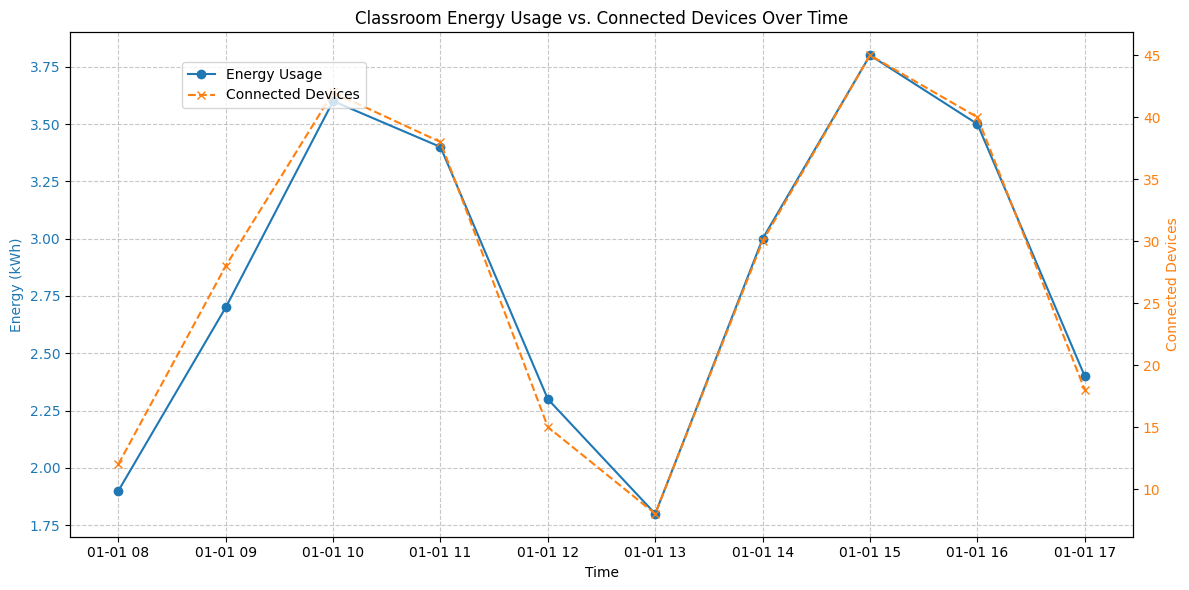

In [27]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Energy Usage on primary y-axis
color = 'tab:blue'
ax1.set_xlabel('Time')
ax1.set_ylabel('Energy (kWh)', color=color)
ax1.plot(df.index, df['energy_kwh'], color=color, marker='o', label='Energy Usage')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, linestyle='--', alpha=0.7)

# Create a second y-axis for Connected Devices
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Connected Devices', color=color)
ax2.plot(df.index, df['connected_devices'], color=color, marker='x', linestyle='--', label='Connected Devices')
ax2.tick_params(axis='y', labelcolor=color)

# Add title and legend
plt.title('Classroom Energy Usage vs. Connected Devices Over Time')
fig.legend(loc='upper left', bbox_to_anchor=(0.15, 0.9))

plt.tight_layout()
plt.show()

### Enhanced Next-Hour Energy Forecast

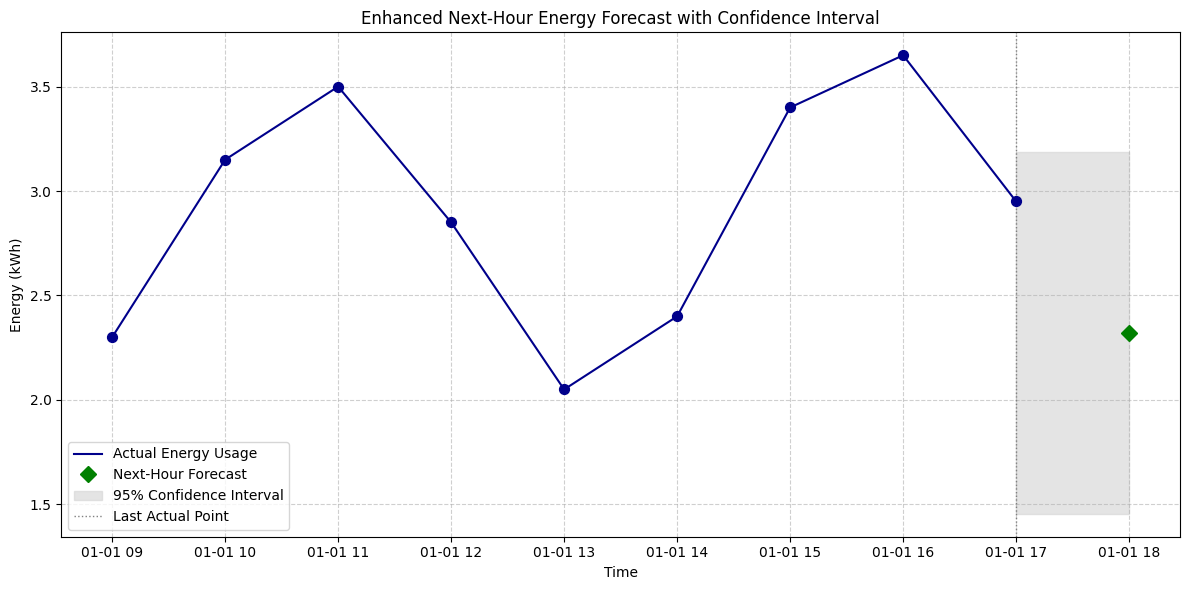

In [28]:
plt.figure(figsize=(12, 6))

# Plot actual energy usage as line and scatter points
plt.plot(energy_series, label='Actual Energy Usage', color='darkblue', linewidth=1.5)
plt.scatter(energy_series.index, energy_series.values, color='darkblue', zorder=5, s=50)

# Get the last historical timestamp for plotting the forecast from
last_historical_timestamp = energy_series.index[-1]
forecast_timestamp = last_historical_timestamp + pd.Timedelta(hours=1)

# Plot the forecast point
plt.plot(forecast_timestamp, forecast_mean, color='green', marker='D', markersize=8, linestyle='None', label='Next-Hour Forecast')

# Plot the confidence interval
plt.fill_between(
    [last_historical_timestamp, forecast_timestamp],
    conf_int.iloc[0],  # Lower bound
    conf_int.iloc[1],  # Upper bound
    color='lightgray', alpha=0.6, label='95% Confidence Interval'
)

# Add a vertical line to indicate the transition from actual to forecast
plt.axvline(x=last_historical_timestamp, color='gray', linestyle=':', linewidth=1.0, label='Last Actual Point')

plt.title('Enhanced Next-Hour Energy Forecast with Confidence Interval')
plt.xlabel('Time')
plt.ylabel('Energy (kWh)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

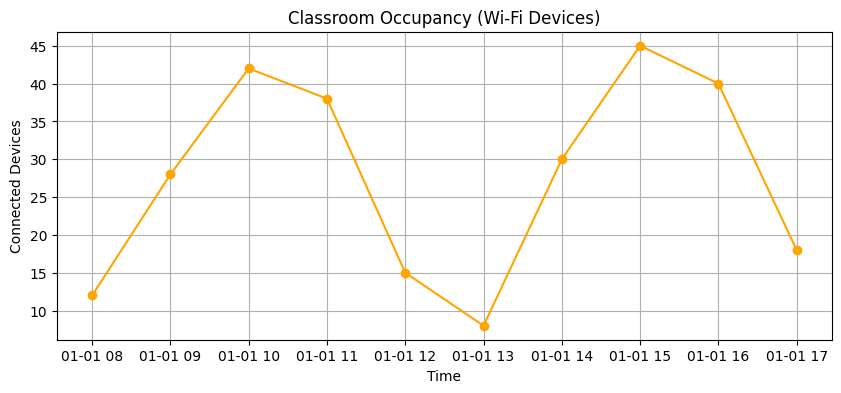

In [29]:
plt.figure(figsize=(10,4))
plt.plot(df.index, df["connected_devices"], color="orange", marker="o")
plt.title("Classroom Occupancy (Wi-Fi Devices)")
plt.xlabel("Time")
plt.ylabel("Connected Devices")
plt.grid(True)
plt.show()


In [30]:
energy_series = df["energy_kwh"]
energy_series



,energy_kwh
timestamp,
2025-01-01 08:00:00,1.9
2025-01-01 09:00:00,2.7
2025-01-01 10:00:00,3.6
2025-01-01 11:00:00,3.4
2025-01-01 12:00:00,2.3
2025-01-01 13:00:00,1.8
2025-01-01 14:00:00,3.0
2025-01-01 15:00:00,3.8
2025-01-01 16:00:00,3.5


In [31]:
energy_series = energy_series.rolling(window=2).mean().dropna()
energy_series


,energy_kwh
timestamp,
2025-01-01 09:00:00,2.30
2025-01-01 10:00:00,3.15
2025-01-01 11:00:00,3.50
2025-01-01 12:00:00,2.85
2025-01-01 13:00:00,2.05
2025-01-01 14:00:00,2.40
2025-01-01 15:00:00,3.40
2025-01-01 16:00:00,3.65
2025-01-01 17:00:00,2.95


In [32]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(energy_series, order=(1,1,1))
model_fit = model.fit()

model_fit.summary()


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             energy_kwh   No. Observations:                    9
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  -5.712
Date:                Thu, 22 Jan 2026   AIC                             17.424
Time:                        05:08:55   BIC                             17.663
Sample:                    01-01-2025   HQIC                            15.817
                         - 01-01-2025                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2559      0.678      0.378      0.706      -1.072       1.584
ma.L1          0.9979    126.832      0.008      0.994    -247.589     249.584
sigma2         0.1752     22.151      0.008      0.994     -43.240      43.590
===================================================================================
Ljung-Box (L1) (Q):                   0.30   Jarque-Bera (JB):                 0.81
Prob(Q):                              0.58   Prob(JB):                         0.67
Heteroskedasticity (H):               0.70   Skew:                             0.34
Prob(H) (two-sided):                  0.78   Kurtosis:                         1.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [33]:
forecast = model_fit.get_forecast(steps=1)

forecast_mean = forecast.predicted_mean.iloc[0]
conf_int = forecast.conf_int().iloc[0]

print("🔮 Next Hour Energy Forecast:", round(forecast_mean, 2), "kWh")
print("📉 Lower Bound:", round(conf_int[0], 2), "kWh")
print("📈 Upper Bound:", round(conf_int[1], 2), "kWh")


🔮 Next Hour Energy Forecast: 2.32 kWh
📉 Lower Bound: 1.45 kWh
📈 Upper Bound: 3.19 kWh


/tmp/ipython-input-2012426754.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("📉 Lower Bound:", round(conf_int[0], 2), "kWh")
/tmp/ipython-input-2012426754.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("📈 Upper Bound:", round(conf_int[1], 2), "kWh")


/tmp/ipython-input-1078957712.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  conf_int[0],
/tmp/ipython-input-1078957712.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  conf_int[1],


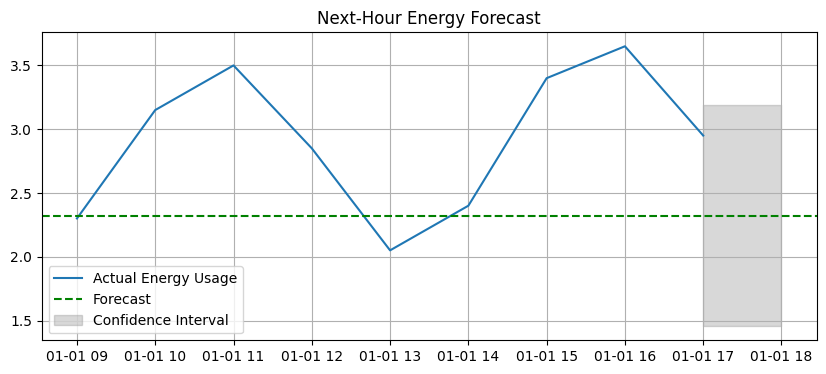

In [34]:
plt.figure(figsize=(10,4))
plt.plot(energy_series, label="Actual Energy Usage")
plt.axhline(forecast_mean, color="green", linestyle="--", label="Forecast")

plt.fill_between(
    [energy_series.index[-1], energy_series.index[-1] + pd.Timedelta(hours=1)],
    conf_int[0],
    conf_int[1],
    color="gray",
    alpha=0.3,
    label="Confidence Interval"
)

plt.title("Next-Hour Energy Forecast")
plt.legend()
plt.grid(True)
plt.show()
